<a href="https://colab.research.google.com/github/K-107/NLP_Practice/blob/main/Transformers_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 위키독스 딥 러닝을 이용한 자연어 처리 입문의 트랜스포머 부분

https://wikidocs.net/31379

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## 1.인코더 부분

### 포지셔널 인코딩(Positional Encoding)

In [2]:
class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)
    # position은 문장 길이, d_model은 단어의 임베딩 차원인 512이다.

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    # i는 한 단어의 백터 내의 차원 인덱스이다. //은 몫만 남는다.
    # 사실 position은 입력 문장에서의 임베딩 벡터의 위치를 나타내는데
    # 바로 밑의 positional_encoding 함수에서 range로 다 쪼갠다.
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)
    # position은 문장 내 단어들의 수로 n행 1열을 만들어준다.
    # 그리고 각 단어들 마다 임베딩 차원을 줘야해서 1행 512열을 만든 것이다.

    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2]) # 0::2는 짝수다.

    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2]) # 1::2는 홀수다.

    angle_rads = np.zeros(angle_rads.shape) # 깡통을 만들어주고,
    angle_rads[:, 0::2] = sines # 깡통에 짝수 열은 sines를 넣는다.
    angle_rads[:, 1::2] = cosines # 깡통에 홀수 열은 cosines를 넣는다.
    pos_encoding = tf.constant(angle_rads) # 상수로 만들어준다. 왜이러는..?
    pos_encoding = pos_encoding[tf.newaxis, ...] # 3차원으로 만들어준다.

    print(pos_encoding.shape)
    return tf.cast(pos_encoding, tf.float32) # pos_encoding를 실수화한다.

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :] # tf.shape(inputs)[1]은 인풋의 행만 뽑는다.

8번 라인

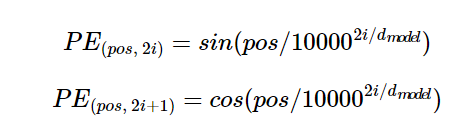

In [7]:
# 16번 라인
tf.range(50, dtype=tf.float32)[:, tf.newaxis]
# 50행 1열이 된다.

<tf.Tensor: shape=(50, 1), dtype=float32, numpy=
array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.]], dtype=float32)>

In [9]:
# 17번 라인
tf.range(128, dtype=tf.float32)[tf.newaxis, :]
# 1행 128열이 된다.

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127.]], dtype=float32)>

(1, 50, 128)


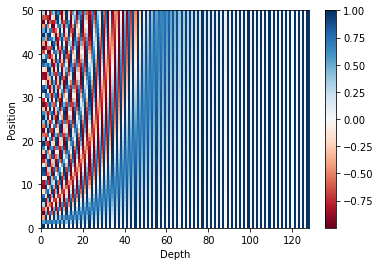

In [3]:
# 문장의 길이 50, 임베딩 벡터의 차원 128
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

# 문장 내 단어들이 50개 있다고 생각하고 한 단어 당 128차원으로 임베딩이 돼있는 것들을
# 포지셔널 임베딩 값을 더해줘서 이렇게 바뀌었다.

### 스케일드 닷-프로덕트 어텐션

In [28]:
def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads), num_heads는 8이고, d_model/num_heads는 64다.
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True) # 키를 전치해서 행렬곱한다.

  # 스케일링
  # dk의 루트값으로 나눠준다.
  depth = tf.cast(tf.shape(key)[-1], tf.float32) # tf.shape(key)[-1]은 단어의 임베딩 차원이다.
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값(-1e9=-1000000000.0)을 넣는다.
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value) # 성분곱이다.

  return output, attention_weights

8번 라인

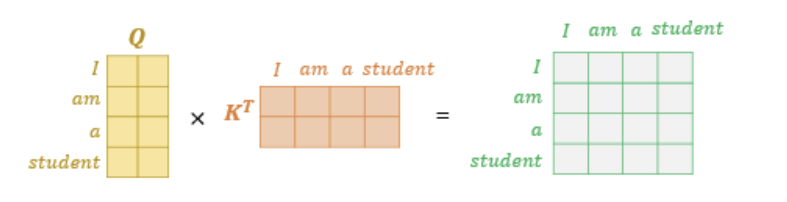

13번 라인

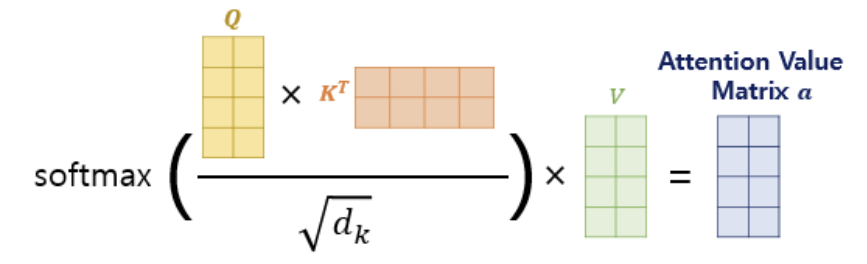

22번 라인

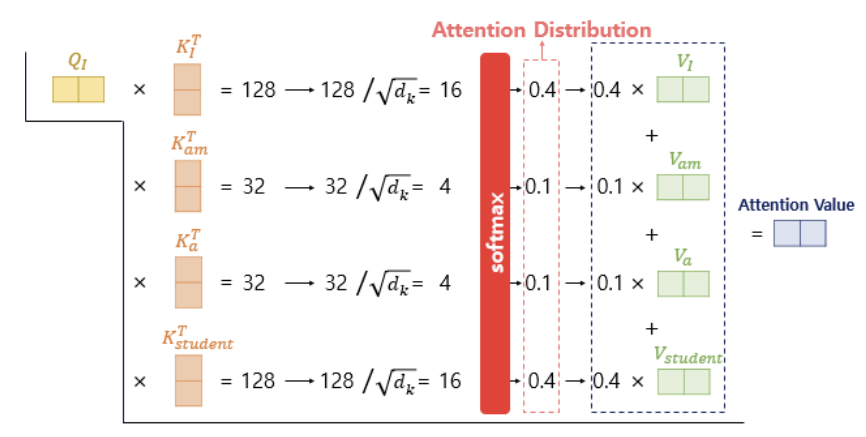

In [14]:
# 임의의 Query, Key, Value인 Q, K, V 행렬 생성
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)

In [17]:
# 함수 실행

# temp_q와 temp_k.T가 내적된다.
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
# 당연히 똑같은 temp_k의 2행만 코사인 유사도가 1이 나오고 나머지는 직교하므로 0이다.

print(temp_out) # 어텐션 값
# 벨류의 각 행과 곱하고 모두 합한다.

tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [25]:
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn, matmul_qk = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)

print(temp_out) # 어텐션 값

matmul_qk # return output, attention_weights, matmul_qk로 바꿨었다.

# 잘 생각해보면 내적한 값이 [[  0.,   0., 100., 100.]]나오고 그걸 소프트맥스 하니까 [[0.  0.  0.5 0.5]]가 나온 것이다.
# 그걸 또 value랑 곱하고 더하니까(가중합) [[550.    5.5]]가 나온것이다.

tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[  0.,   0., 100., 100.]], dtype=float32)>

In [29]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


### 멀티 헤드 어텐션(Multi-head Attention)

In [30]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads # 8개
    self.d_model = d_model # 512

    assert d_model % self.num_heads == 0
    # assert는 뒤의 조건이 True가 아니면 AssertError를 발생한다.

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    # 3차원이 4차원이 되면서 자동으로 나뉜다.
    return tf.transpose(inputs, perm=[0, 2, 1, 3])
    # perm은 차원의 순을 정하는 것이다.
    # https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=magnking&logNo=221319690563

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
        # 아니...inputs에 이미 다 컬럼이 정해져서 함수에 입력된겨...?
        # def encoder_layer에서 inputs를 복사해서 해준다!
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 먼저 WQ, WK, WV을 지난다음에 헤드가 나눠지는 구먼...

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # output만 받는다. 어텐션 웨이츠 걍 보여줄라고 한 거임.
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))
    # 와 이렇게 그냥 연결해버리는구나...

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

44~46라인

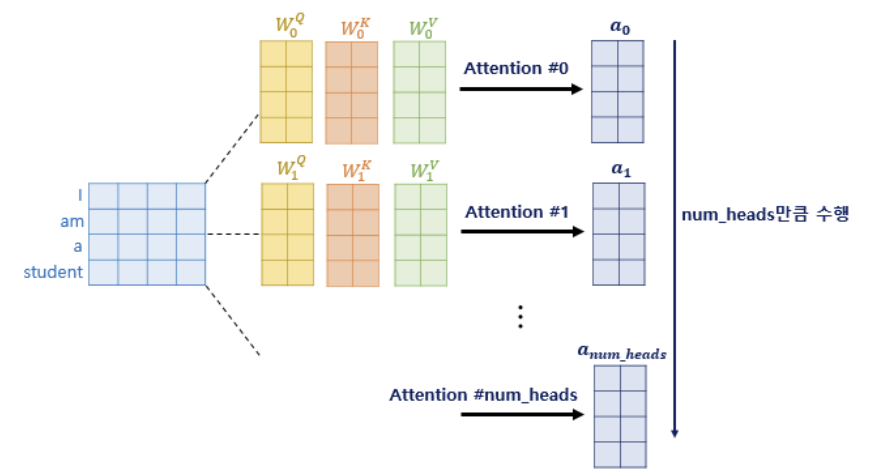

67라인

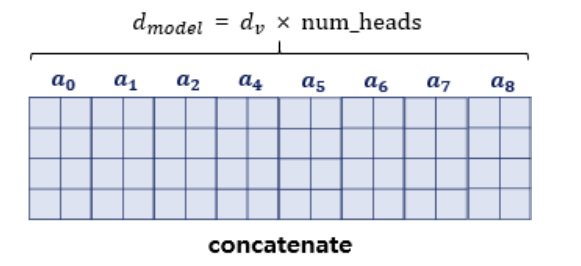

73라인

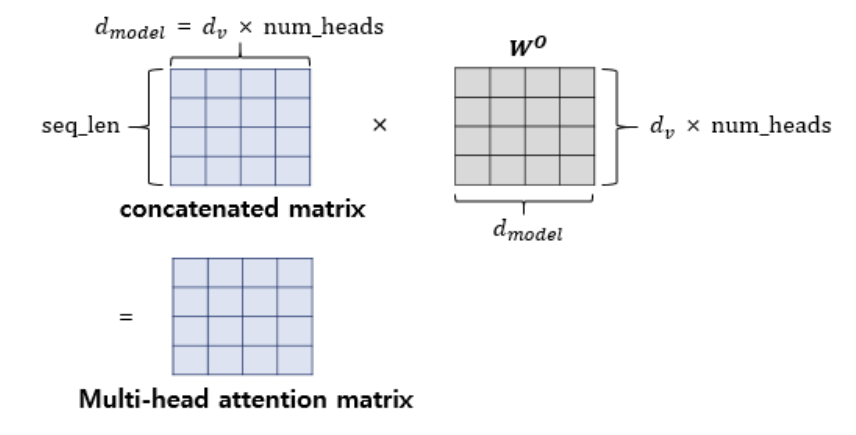

### 패딩 마스크(Padding Mask)

걍 이건 예제일 뿐이다.



In [31]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # tf.math.equal의 bool을 tf.cast가 실수값으로 바꿔준다.

  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

In [32]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


### 포지션-와이즈 피드 포워드 신경망(Position-wise FFNN)

### 인코더 구현하기

In [35]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  # dff는 2048이다.

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")
  # 이게 모여...? 아 입력이라고~~~
  # 그러니까 인코더의 입력이 inputs랑 padding_mask 두 개다.

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

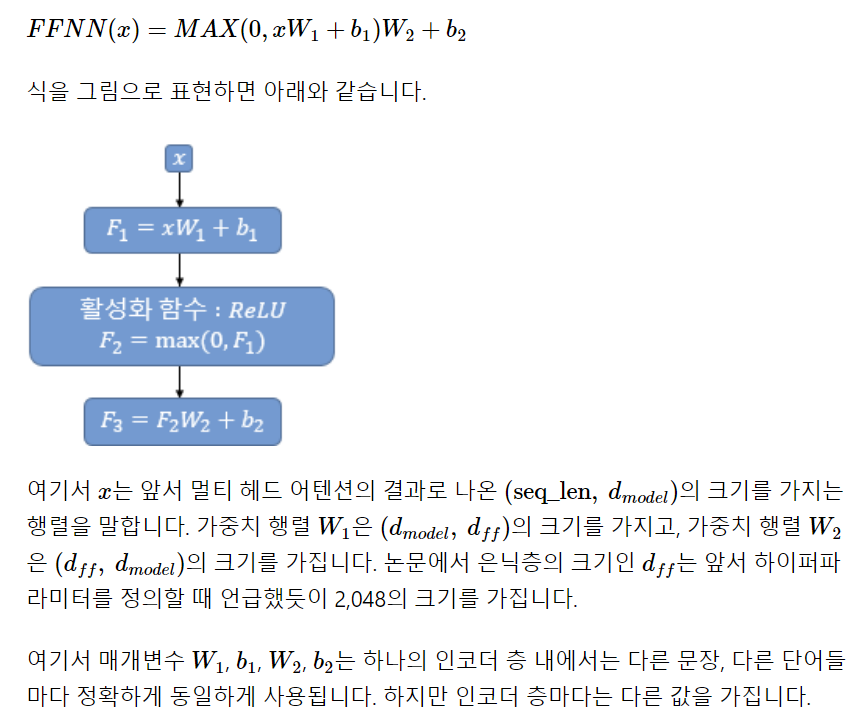

### 인코더 쌓기

In [40]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  # 512로 일단 임베딩함.
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  # https://stackoverflow.com/questions/56930821/why-does-embedding-vector-multiplied-by-a-constant-in-transformer-model
  # 왜 tf.math.sqrt(tf.cast(d_model, tf.float32))을 하는지?에 대한 설명.
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

## 2.디코더 부분

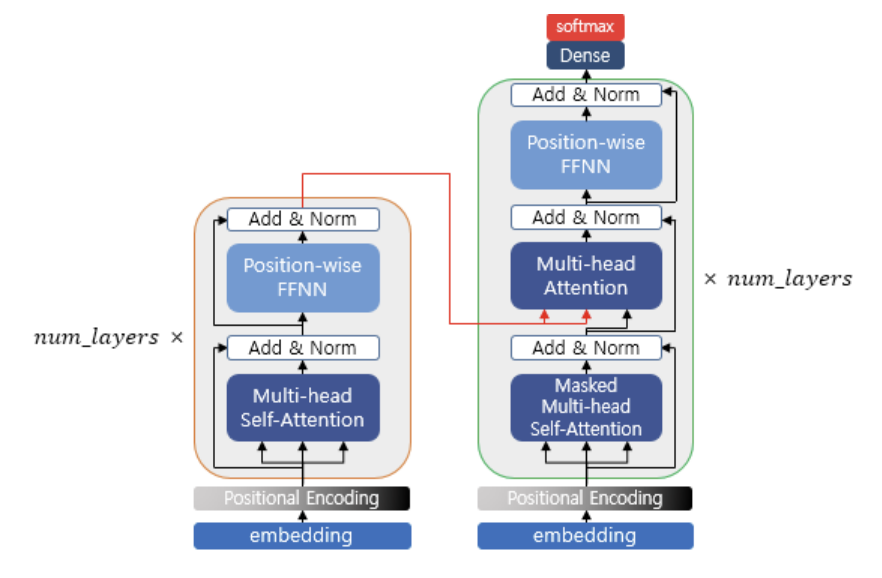

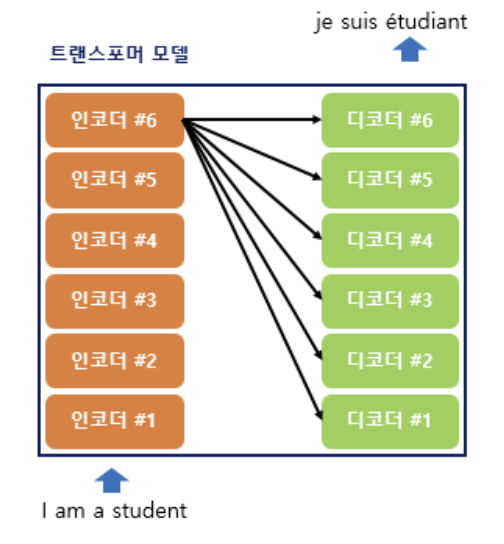